In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [4]:
df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [5]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    98016
1     6984
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [7]:
X = df.drop(columns=['SeriousDlqin2yrs','ID'])
y = df['SeriousDlqin2yrs']

In [8]:
print(X.shape)
print(y.shape)

(105000, 10)
(105000,)


In [9]:
df[['Age', 'MonthlyIncome', 'DebtRatio']].describe()


,Age,MonthlyIncome,DebtRatio
count,105000.000000,8.416400e+04,105000.000000
mean,52.325610,6.703641e+03,352.044192
std,14.766425,1.622288e+04,1820.229318
min,21.000000,0.000000e+00,0.000000
25%,41.000000,3.400000e+03,0.174950
50%,52.000000,5.400000e+03,0.366061
75%,63.000000,8.250000e+03,0.870083
max,109.000000,3.008750e+06,329664.000000


In [10]:
columnas = df.columns

In [11]:
for columna in columnas:
    media = df.groupby('SeriousDlqin2yrs')[columna].mean()
    print(columna, media)

ID SeriousDlqin2yrs
0    74984.990828
1    75307.738402
Name: ID, dtype: float64
RevolvingUtilizationOfUnsecuredLines SeriousDlqin2yrs
0    5.468979
1    4.106051
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
Age SeriousDlqin2yrs
0    52.777210
1    45.987686
Name: Age, dtype: float64
NumberOfTime30-59DaysPastDueNotWorse SeriousDlqin2yrs
0    0.274761
1    2.298253
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64
DebtRatio SeriousDlqin2yrs
0    356.126175
1    294.756154
Name: DebtRatio, dtype: float64
MonthlyIncome SeriousDlqin2yrs
0    6787.119364
1    5577.228690
Name: MonthlyIncome, dtype: float64
NumberOfOpenCreditLinesAndLoans SeriousDlqin2yrs
0    8.499072
1    7.910939
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64
NumberOfTimes90DaysLate SeriousDlqin2yrs
0    0.130989
1    1.989691
Name: NumberOfTimes90DaysLate, dtype: float64
NumberRealEstateLoansOrLines SeriousDlqin2yrs
0    1.021119
1    0.989404
Name: NumberRealEstateLoansOrLines, dtype: float

In [12]:
correlacion = df.corr()
correlacion

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
ID,1.000000,0.000154,0.002974,0.002196,-0.003007,0.002631,0.002774,0.001033,-0.001972,0.001497,-0.000140,0.001857
RevolvingUtilizationOfUnsecuredLines,0.000154,1.000000,-0.004256,-0.001181,0.003941,0.005089,-0.013877,-0.001193,0.007394,-0.001104,0.000731,-0.001685
Age,0.002974,-0.004256,1.000000,-0.062235,0.025206,0.032551,0.145692,-0.060004,0.029178,-0.056341,-0.210795,-0.114572
NumberOfTime30-59DaysPastDueNotWorse,0.002196,-0.001181,-0.062235,1.000000,-0.007335,-0.008107,-0.052518,0.982646,-0.028891,0.986302,0.000118,0.124291
DebtRatio,-0.003007,0.003941,0.025206,-0.007335,1.000000,-0.024307,0.055192,-0.009186,0.130042,-0.008252,-0.047934,-0.008401
MonthlyIncome,0.002631,0.005089,0.032551,-0.008107,-0.024307,1.000000,0.083650,-0.010720,0.110141,-0.009163,0.058494,-0.018902
NumberOfOpenCreditLinesAndLoans,0.002774,-0.013877,0.145692,-0.052518,0.055192,0.083650,1.000000,-0.078131,0.435138,-0.069019,0.065161,-0.028543
NumberOfTimes90DaysLate,0.001033,-0.001193,-0.060004,0.982646,-0.009186,-0.010720,-0.078131,1.000000,-0.044308,0.992445,-0.007561,0.114855
NumberRealEstateLoansOrLines,-0.001972,0.007394,0.029178,-0.028891,0.130042,0.110141,0.435138,-0.044308,1.000000,-0.038554,0.127343,-0.006987
NumberOfTime60-89DaysPastDueNotWorse,0.001497,-0.001104,-0.056341,0.986302,-0.008252,-0.009163,-0.069019,0.992445,-0.038554,1.000000,-0.008428,0.100458


<Figure size 5000x5000 with 0 Axes>

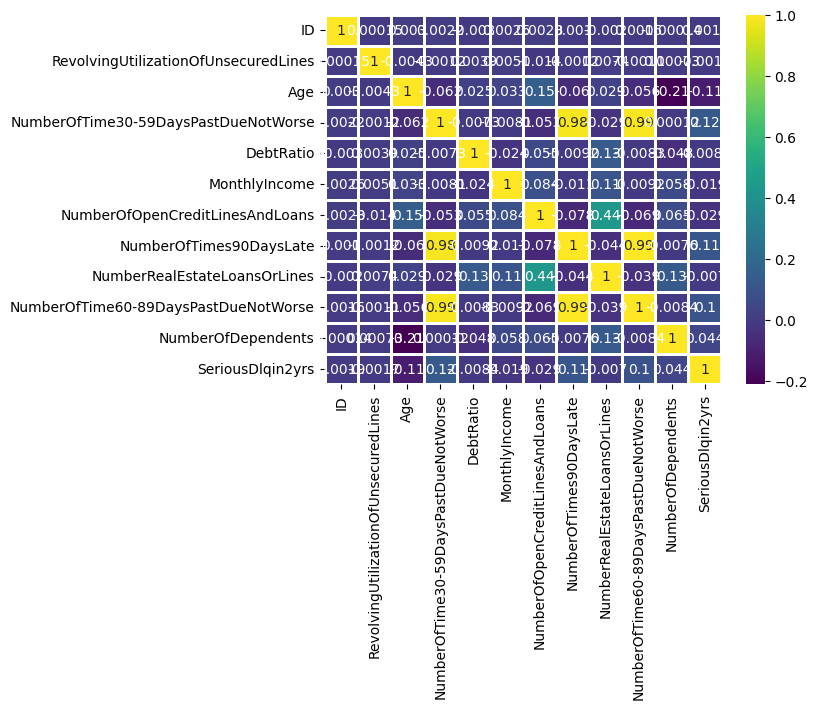

<Figure size 5000x5000 with 0 Axes>

In [13]:
sns.heatmap(correlacion, cmap='viridis',annot=True,linewidths=1)    
plt.figure(figsize=(50,50))

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(
#     X, y,
#     test_size=0.2,
#     stratify=y,
#     random_state=42
# )

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_logreg = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        class_weight='balanced',
        max_iter=1000
    ))
])


In [16]:
pipe_logreg.fit(X_train, y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [17]:
from sklearn.metrics import roc_auc_score

y_val_proba = pipe_logreg.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_val_proba)

0.7871758705216223

In [14]:
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
scale_pos_weight

np.float64(14.034364261168385)

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42
)


In [20]:
xgb_model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [43]:
y_val_proba = xgb_model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_val_proba)


0.8515701309504765

In [44]:
df_test = pd.read_csv('test.csv')

In [45]:
from sklearn.metrics import classification_report

y_val_pred = (y_val_proba > 0.5).astype(int)
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19603
           1       0.23      0.72      0.35      1397

    accuracy                           0.82     21000
   macro avg       0.60      0.77      0.62     21000
weighted avg       0.93      0.82      0.86     21000



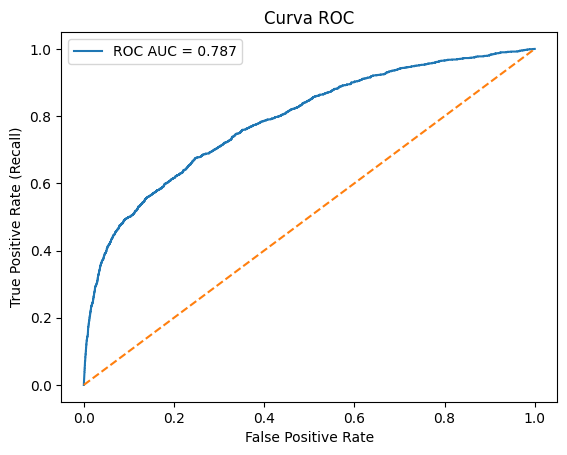

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.show()


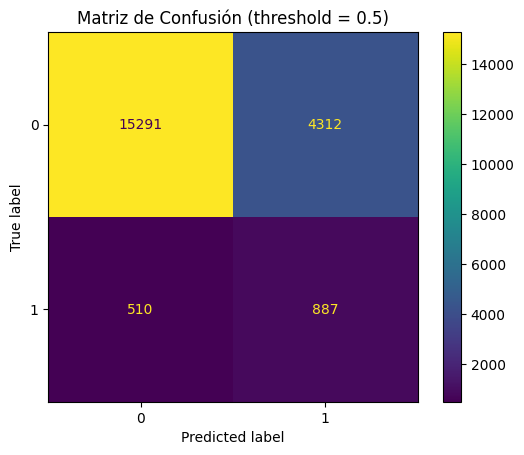

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones con umbral 0.5
y_val_pred = (y_val_proba >= 0.5).astype(int)

cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusión (threshold = 0.5)')
plt.show()


In [15]:
def agregar_features(df):
    df['Income_per_Dependent'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
    df['Debt_per_Income'] = df['DebtRatio'] / (df['MonthlyIncome'] + 1)
    df['ZeroIncome'] = (df['MonthlyIncome'] == 0).astype(int)
    df['HighUtilization'] = (df['RevolvingUtilizationOfUnsecuredLines'] > 1).astype(int)
    df['TotalLate'] = (
    df['NumberOfTimes90DaysLate'] +
    df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTime30-59DaysPastDueNotWorse']
)



In [16]:
print(X.shape)


(105000, 10)


In [17]:
agregar_features(X)


In [18]:
X.shape

(105000, 15)

In [ ]:
from xgboost import XGBClassifier

xgb_model_2 = XGBClassifier(
    n_estimators=1000,          # ponemos muchos → early stopping decide
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds =50,
)



In [24]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

auc_scores = []
best_iterations = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    model = XGBClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=1,
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        n_jobs=-1,
        early_stopping_rounds = 50
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    y_val_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_proba)

    auc_scores.append(auc)
    best_iterations.append(model.best_iteration)

    print(f"Fold {fold} | AUC: {auc:.5f} | Best trees: {model.best_iteration}")


Fold 1 | AUC: 0.86020 | Best trees: 121
Fold 2 | AUC: 0.86560 | Best trees: 128
Fold 3 | AUC: 0.86449 | Best trees: 154
Fold 4 | AUC: 0.86334 | Best trees: 82
Fold 5 | AUC: 0.86099 | Best trees: 78


In [27]:
print(f"\nMean AUC: {np.mean(auc_scores):.5f}")
print(f"Std AUC:  {np.std(auc_scores):.5f}")
print(f"Avg best_iteration: {int(np.mean(best_iterations))}")


Mean AUC: 0.86292
Std AUC:  0.00205
Avg best_iteration: 112


In [28]:
final_model = XGBClassifier(
    n_estimators=int(np.mean(best_iterations)),
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

final_model.fit(X, y)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [20]:
df_test = pd.read_csv('test.csv')

In [21]:
df_ids = df_test['ID']
df_ids

0        129460
1        134018
2         86523
3        138466
4        143905
          ...  
44995    124596
44996     75895
44997     92453
44998    139288
44999     59825
Name: ID, Length: 45000, dtype: int64

In [35]:
df_predict = df_test.copy()
df_predict = df_predict.drop(columns='ID')
df_predict.head(3)


,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.000000,21,0,8.000000,NaN,0,0,0,0,NaN
1,0.009878,38,0,0.229978,10500.0,10,0,1,0,1.0
2,0.276836,70,0,1914.000000,NaN,23,0,1,0,0.0


In [36]:
df_predict.shape

(45000, 10)

In [37]:
agregar_features(df_predict)

In [38]:
df_predict.shape

(45000, 15)

In [37]:
test_proba = final_model.predict_proba(df_predict)[:, 1]

submission = pd.DataFrame({
    'ID': df_ids,
    'SeriousDlqin2yrs': test_proba
})

submission.to_csv("submission_2.csv", index=False)


In [ ]:
xgb_model_2.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],

    verbose=True
)

In [61]:
xgb_model_2.best_iteration

98

In [62]:
from sklearn.metrics import roc_auc_score

y_val_proba = xgb_model_2.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_proba)

roc_auc

0.8591942141706138

In [63]:
from sklearn.metrics import classification_report

y_val_pred = (y_val_proba >= 0.5).astype(int)
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.98      0.80      0.88     19603
           1       0.21      0.76      0.33      1397

    accuracy                           0.80     21000
   macro avg       0.60      0.78      0.61     21000
weighted avg       0.93      0.80      0.84     21000



In [26]:
df_predict = df_test.copy()

In [27]:
df_predict = df_predict.drop(columns='ID')

In [79]:
predicciones = xgb_model_2.predict_proba(df_predict)[:, 1]

In [80]:
predicciones

array([0.45144653, 0.09495444, 0.13581406, ..., 0.5574437 , 0.6074358 ,
       0.4418832 ], shape=(45000,), dtype=float32)

In [81]:
df_id = df_test['ID']
df_id

0        129460
1        134018
2         86523
3        138466
4        143905
          ...  
44995    124596
44996     75895
44997     92453
44998    139288
44999     59825
Name: ID, Length: 45000, dtype: int64

In [82]:
submission = pd.DataFrame({
    'ID': df_id,
    'SeriousDlqin2yrs': predicciones
})

In [83]:
submission.to_csv('submission.csv', index=False)

In [44]:
from xgboost import XGBClassifier

def train_xgb(seed):
    scale_pos_weight = (y == 0).sum() / (y == 1).sum()

    model = XGBClassifier(
        n_estimators=112,  # el promedio que sacaste del CV
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=1,
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=seed,
        n_jobs=-1,
        early_stopping_rounds = 50
    )

    model.fit(
        X, y,
        eval_set=[(X, y)],
        verbose=False
    )
    return model


In [45]:
seeds = [42, 7, 123]
models = []

for seed in seeds:
    print(f"Training model with seed {seed}")
    models.append(train_xgb(seed))


Training model with seed 42
Training model with seed 7
Training model with seed 123


In [46]:
test_probas = []

for model in models:
    proba = model.predict_proba(df_predict)[:, 1]
    test_probas.append(proba)


In [47]:
import numpy as np

final_proba = np.mean(test_probas, axis=0)

In [48]:
final_proba.shape

(45000,)

In [49]:
submission = pd.DataFrame({
    'ID': df_ids,
    'SeriousDlqin2yrs': final_proba
})

submission.to_csv("submission_4.csv", index=False)


In [29]:
from xgboost import XGBClassifier

depths = [4, 5, 6]
models = []

for d in depths:
    model = XGBClassifier(
        n_estimators=112,
        learning_rate=0.05,
        max_depth=d,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=1,
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        n_jobs=-1
    )
    model.fit(X, y)
    models.append(model)


In [40]:
import numpy as np

final_proba = np.mean(
    [m.predict_proba(df_predict)[:,1] for m in models],
    axis=0
)


In [33]:
X.shape

(105000, 15)

In [39]:
df_predict.shape

(45000, 15)

In [41]:
final_proba

array([0.5116487 , 0.12183469, 0.11987424, ..., 0.58934116, 0.5959082 ,
       0.405352  ], shape=(45000,), dtype=float32)

In [42]:
submission = pd.DataFrame({
    'ID': df_ids,
    'SeriousDlqin2yrs': final_proba
})

submission.to_csv("submission_5.csv", index=False)